# Task # 2 - To Explore Supervised Machine Learning

Importing Relevant Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Load the dataset

In [3]:
data_link = ("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data = pd.read_csv(data_link)

Checking Correlation In Variables

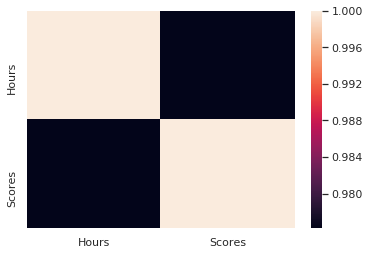

In [4]:
sns.heatmap(data.corr())

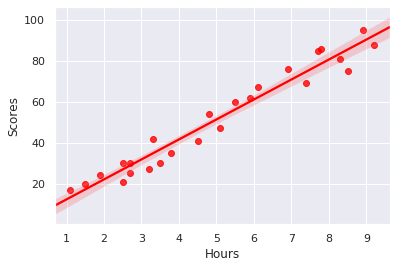

In [5]:
sns.regplot(x=data['Hours'],y=data['Scores'],color='red')

Selecting the inputs and outputs

In [6]:
x = data.iloc[:, :-1]
y = data.iloc[:, 1]

Splitting the dataset into test and train

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

Training the model

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

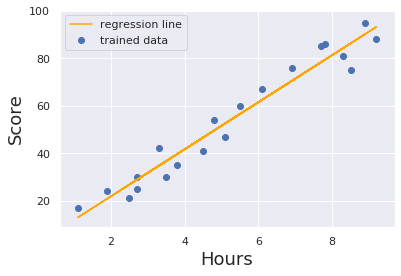

In [10]:
yhat = (reg.coef_*x_train )+reg.intercept_
plt.plot(x_train,yhat,c='orange',label='regression line')
plt.scatter(x_train,y_train,label='trained data')
plt.xlabel('Hours',fontsize=18)
plt.ylabel('Score',fontsize=18)
plt.legend()

Predicting the value

In [11]:
prediction = reg.predict(x_test)
prediction

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Comparing the actual and predicted

In [15]:
compare = pd.DataFrame({'Actual':y_test})
compare.reset_index(drop=True,inplace=True)
compare['Predicted']=prediction
compare['Deviation']=abs(compare['Actual']-compare['Predicted'])
compare

,Actual,Predicted,Deviation
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


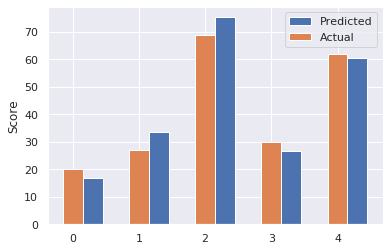

In [18]:
plt.bar(np.arange(5)+0.3,compare.Predicted,width=0.3,label='Predicted')
plt.bar(np.arange(5),compare.Actual,width=0.3,label='Actual')
plt.ylabel('Score')
plt.legend()

Evaluating the model

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE1 = mean_absolute_error(prediction , y_test)
RMSE1 = np.sqrt(mean_squared_error(prediction , y_test))
print('Mean Absolute Error = ',MAE1.round(3))
print('Root Mean Squared Error = ',RMSE1.round(3))

Mean Absolute Error =  4.184
Root Mean Squared Error =  4.647


Final Result

In [20]:
n = float(input())
Score = reg.predict([[n]])
print ('After Studying For {} Hours, The Estimated Score Should be \n{}'.format(n,Score.round(2)))

 9.25


After Studying For 9.25 Hours, The Estimated Score Should be 
[93.69]
